# Predicting Tennis Match Outcomes

### INTRODUCTION 

**Background:**  

Having originated in the 12th century in Europe, tennis is now popularly played competitively and recreationally globally. The game, known as a match, involves using rackets to hit a ball across a net in the court between two players or pairs. Points are scored when a player is unable to return the incoming ball across the court or when the ball bounces twice on their side of the court. 

**Research question:**

What would the outcome of a match between two players be based on previous match statistics?

**Data Set:**

Data analysis will be done on the "Game results for Top 500 Players from 2017-2019" data set [1], collected by the Association of Tennis Professionals (ATP). In the data set, each observation is data for a specific match while each variable is a match or player statistic.

Variable definitions: [2] 
- tourney_id = unique identifier for each tournament 
- tourney_name = tournament name
- surface = court surface
- draw_size = total tournament draw size
- tourney_level = tour events
- tourney_date = eight digits (YYYYMMDD) usually the Monday of the tournament week
- match_num = a match-specific identifier
- winner_id/loser_id = player_id of the match winner/loser
- winner_seed/loser_seed = seed of match winner/loser
- winner_entry/loser_entry = 'WC' - wild card, 'Q' - qualifier, 'LL' - lucky loser, 'PR' - protected ranking, 'ITF' - ITF entry
- winner_name/loser_name = name of winner/loser
- winner_hand/loser_hand = dominant hand of winner/loser
- winner_ht/loser_ht = height in cm
- winner_ioc/loser_ioc = 3-character country code
- winner_age/loser_age = age in years
- score = final score
- best_of = '3' or '5' indicating the number of sets for this match
- round = round of tournament
- minutes = match length
- w_ace/l_ace = ace count
- w_df/l_df = double fault counts
- w_svpt/l_svpt = serve points
- w_1stIn/l_1stIn = first serves made
- w_1stWon/l_1stWon = first serve points won
- w_2ndWon/l_2ndWon = second serve points won
- w_SvGms/l_SvGms = service games won
- w_bpSaved/l_bpSaved = break points saved
- w_bpFaced/l_bpFaced = break points faced
- winner_rank/loser_rank = ATP or WTA rank, as of the tourney_date or most recent ranking date before tourney_date
- winner_rank_points/loser_rank_points = number of ranking points

### METHODS AND RESULTS

In [3]:
library(plyr)
library(tidyverse)
library(repr)
library(tidymodels)
set.seed(1)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()   masks plyr::arrange()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::id()        masks plyr::id()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::mutate()    masks plyr::mutate()
✖ dplyr::rename()    masks plyr::rename()
✖ dplyr::summarise() masks plyr::summarise()


**Exploring the Data:**

The dataset was read from the internet and tidied to include only the variables needed in our preliminary data exploration. These variables were chosen based on their perceived influence on likelihood to win or lose a match [3]: (for both winner and loser) 
- Country of representation
- Age (years)
- Aces 
- Double fault counts 
- Serve points
- First serves made
- First serve points won
- Second serve points won
- Service games won
- Break points saved
- Break points faced

NOTE: rows in which W/O was found in the score column were removed. 
 
The tidied dataset was then split into training and testing sets and the training set was used for exploratory data analysis. A table of mean values and histograms for each variable were created. 

In [20]:
# Reading the data frame from a URL link
tennis <- read_csv("https://drive.google.com/uc?export=download&id=1fOQ8sy_qMkQiQEAO6uFdRX4tLI8EpSTn")
head(tennis)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  tourney_id = col_character(),
  tourney_name = col_character(),
  surface = col_character(),
  tourney_level = col_character(),
  winner_seed = col_character(),
  winner_entry = col_character(),
  winner_name = col_character(),
  winner_hand = col_character(),
  winner_ioc = col_character(),
  loser_seed = col_character(),
  loser_entry = col_character(),
  loser_name = col_character(),
  loser_hand = col_character(),
  loser_ioc = col_character(),
  score = col_character(),
  round = col_character()
)

See spec(...) for full column specifications.



X1,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,⋯,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,2019-M020,Brisbane,Hard,32,A,20181231,300,105453,2,⋯,54,34,20,14,10,15,9,3590,16,1977
1,2019-M020,Brisbane,Hard,32,A,20181231,299,106421,4,⋯,52,36,7,10,10,13,16,1977,239,200
2,2019-M020,Brisbane,Hard,32,A,20181231,298,105453,2,⋯,27,15,6,8,1,5,9,3590,40,1050
3,2019-M020,Brisbane,Hard,32,A,20181231,297,104542,NA,⋯,60,38,9,11,4,6,239,200,31,1298
4,2019-M020,Brisbane,Hard,32,A,20181231,296,106421,4,⋯,56,46,19,15,2,4,16,1977,18,1855
5,2019-M020,Brisbane,Hard,32,A,20181231,295,104871,NA,⋯,54,40,18,15,6,9,40,1050,185,275


_Table 1: Raw data_

In [21]:
# Wrangling and tidying the data
tennis <- filter(tennis, score!= "W/O")
tennis["Index"] <- seq(1, 6823) # "Index" column is added to keep track of matches and therefore players
tennis <- select(tennis, winner_ioc, loser_ioc, winner_age, loser_age, w_ace, w_df, w_svpt, w_1stIn, w_1stWon, 
    w_2ndWon, w_SvGms, w_bpSaved, w_bpFaced, l_ace, l_df, l_svpt, l_1stIn, l_1stWon, l_2ndWon, l_SvGms, 
    l_bpSaved, l_bpFaced)

# Seperate the statistics for winning and losing players
tennis_w <- select(tennis, starts_with("w")) 
tennis_w["Outcome"] <- "W"
colnames(tennis_w) = gsub("w_","",colnames(tennis_w))
colnames(tennis_w) = gsub("winner_","",colnames(tennis_w))
tennis_w["Index"] <- seq(1, 6823)

tennis_L <- select(tennis, starts_with("l"))
tennis_L["Outcome"] <- "L"
colnames(tennis_L) = gsub("l_","",colnames(tennis_L))
colnames(tennis_L) = gsub("loser_","",colnames(tennis_L))
tennis_L["Index"] <- seq(1, 6823)

# Rejoin the statistics for winning and losing players
tennis <- rbind(tennis_w, tennis_L)

# Changing the column names that start with numbers
names(tennis)[6] <- "firstIn"
names(tennis)[7] <- "firstWon"
names(tennis)[8] <- "secondWon"

In [22]:
# Split the data set into training and testing sets
tennis_split <- initial_split(tennis, prop = 0.75, strata = Outcome)
tennis_train <- training(tennis_split)
tennis_test <- testing(tennis_split) 
tennis_train

# The following exploratory data analysis only uses the training set

ioc,age,ace,df,svpt,firstIn,firstWon,secondWon,SvGms,bpSaved,bpFaced,Outcome,Index
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
JPN,29.00479,3,3,77,44,31,17,13,3,6,W,1
FRA,33.70568,12,2,68,43,34,15,11,4,5,W,4
FRA,31.88227,10,8,94,58,44,18,16,4,8,W,6
RUS,22.88569,16,2,54,34,27,13,10,0,1,W,10
CAN,28.01095,21,3,62,46,40,10,11,0,0,W,11
FRA,31.88227,17,5,84,58,50,17,15,2,2,W,12
JPN,26.40383,15,0,75,48,41,14,11,3,3,W,13
BUL,27.62765,6,2,63,35,27,13,10,2,4,W,14
JPN,29.00479,7,2,56,32,27,15,10,0,0,W,15


_Table 2: Exploratory data analysis variables and match outcome (prediction class variable)_

In [23]:
# Exploratory data analysis table

means_table <- tennis_train %>%
    select(-ioc, -Outcome, -Index) %>%
    map_df(mean, na.rm = TRUE)
means_table

age,ace,df,svpt,firstIn,firstWon,secondWon,SvGms,bpSaved,bpFaced
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
27.57776,6.560134,3.103452,81.70853,50.26935,36.12863,15.97807,12.79634,4.115744,6.749828


_Table 3: Variable means_

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


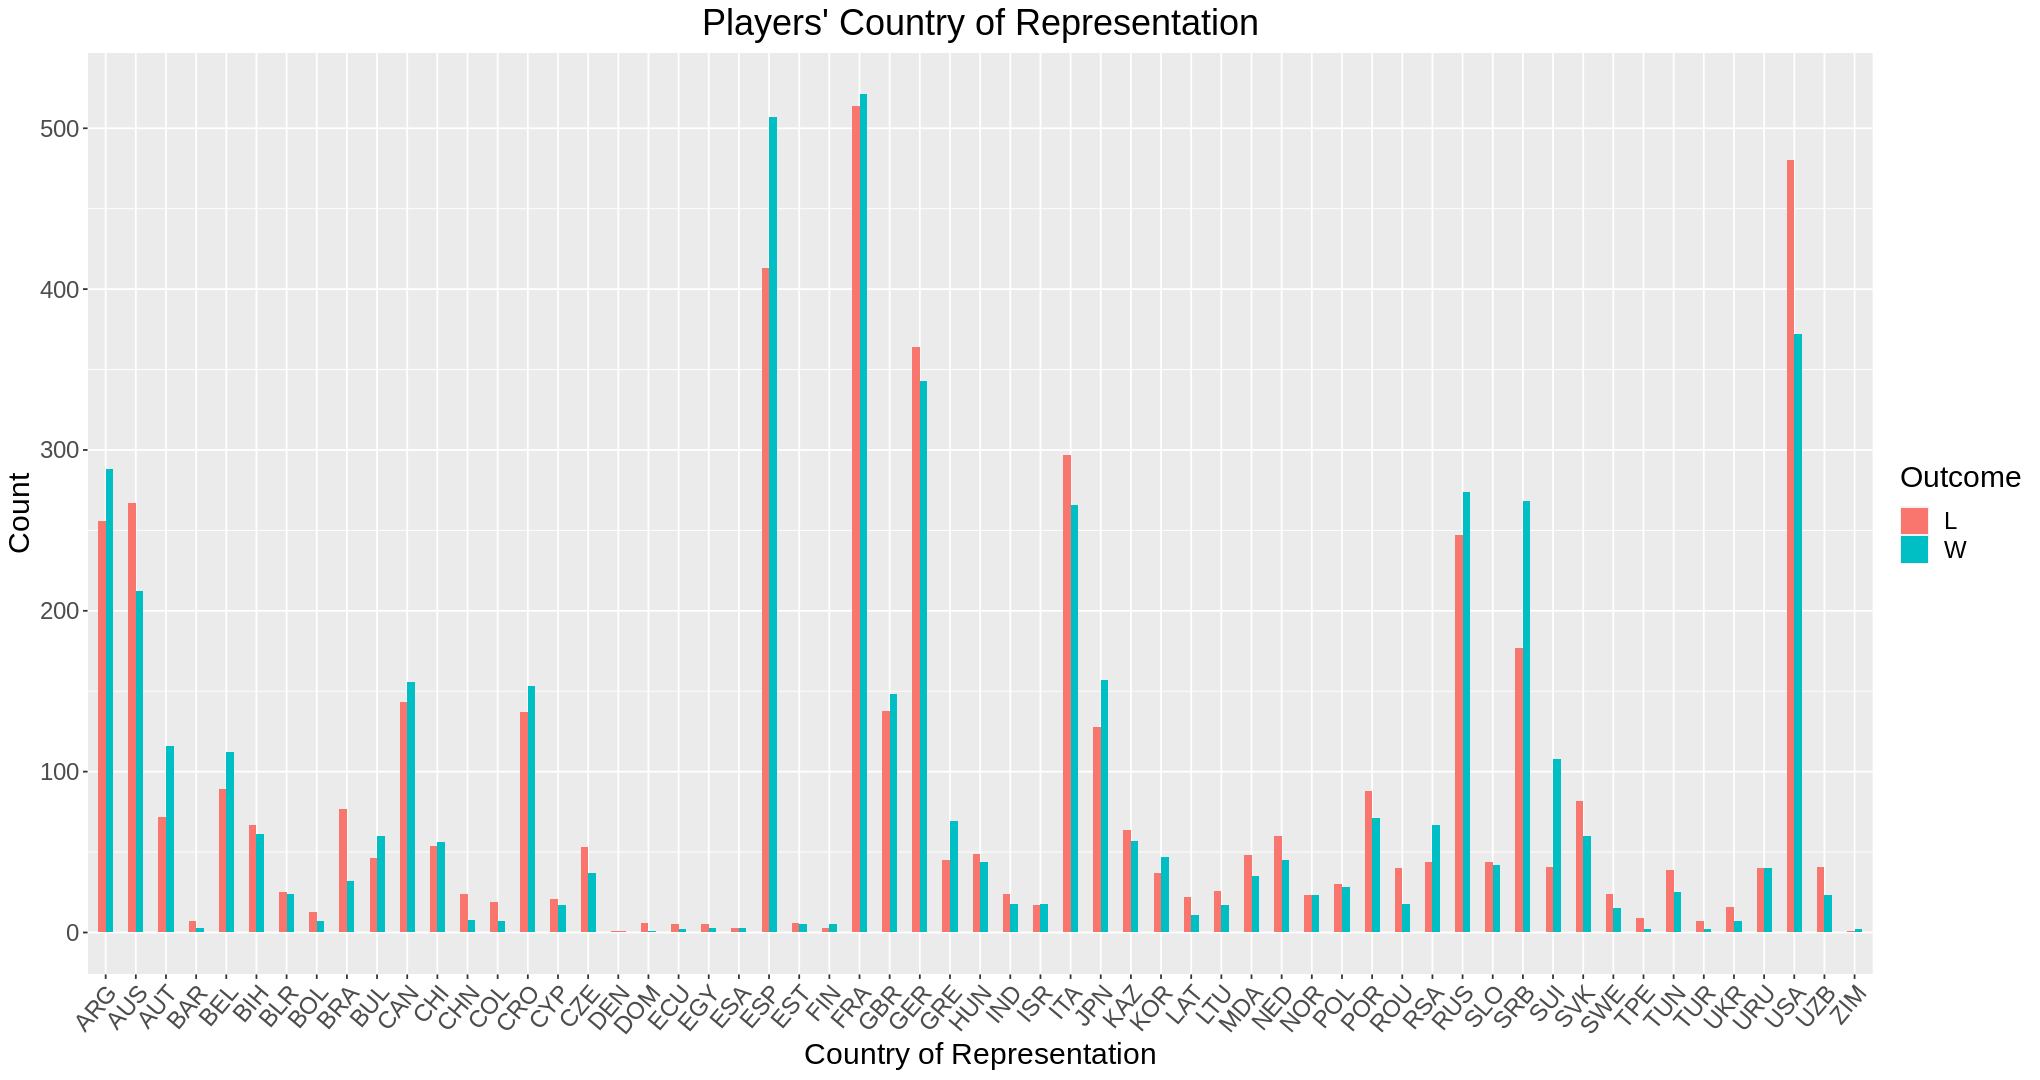

In [24]:
# Exploratory data analysis plot 1:

options(repr.plot.width = 17, repr.plot.height = 9) 

ioc_plot <- tennis_train %>% 
   ggplot(aes(x = ioc, fill = Outcome)) + 
   geom_histogram(stat = "count", position = position_dodge(), width = .5) + 
   xlab("Country of Representation") +
   ylab("Count") +
   theme(text = element_text(size = 18)) +
   theme(axis.text.x = element_text(angle = 50, hjust = 1)) + 
   ggtitle("Players' Country of Representation") +
   theme(plot.title = element_text(hjust = 0.5))
ioc_plot

_Figure 1: Histogram of the players' country of representation coloured by match outcome_

Some countries have higher win rates than others, for example Spain and France, however **there does not appear to be a pattern of certain countries producing more winners or losers.**

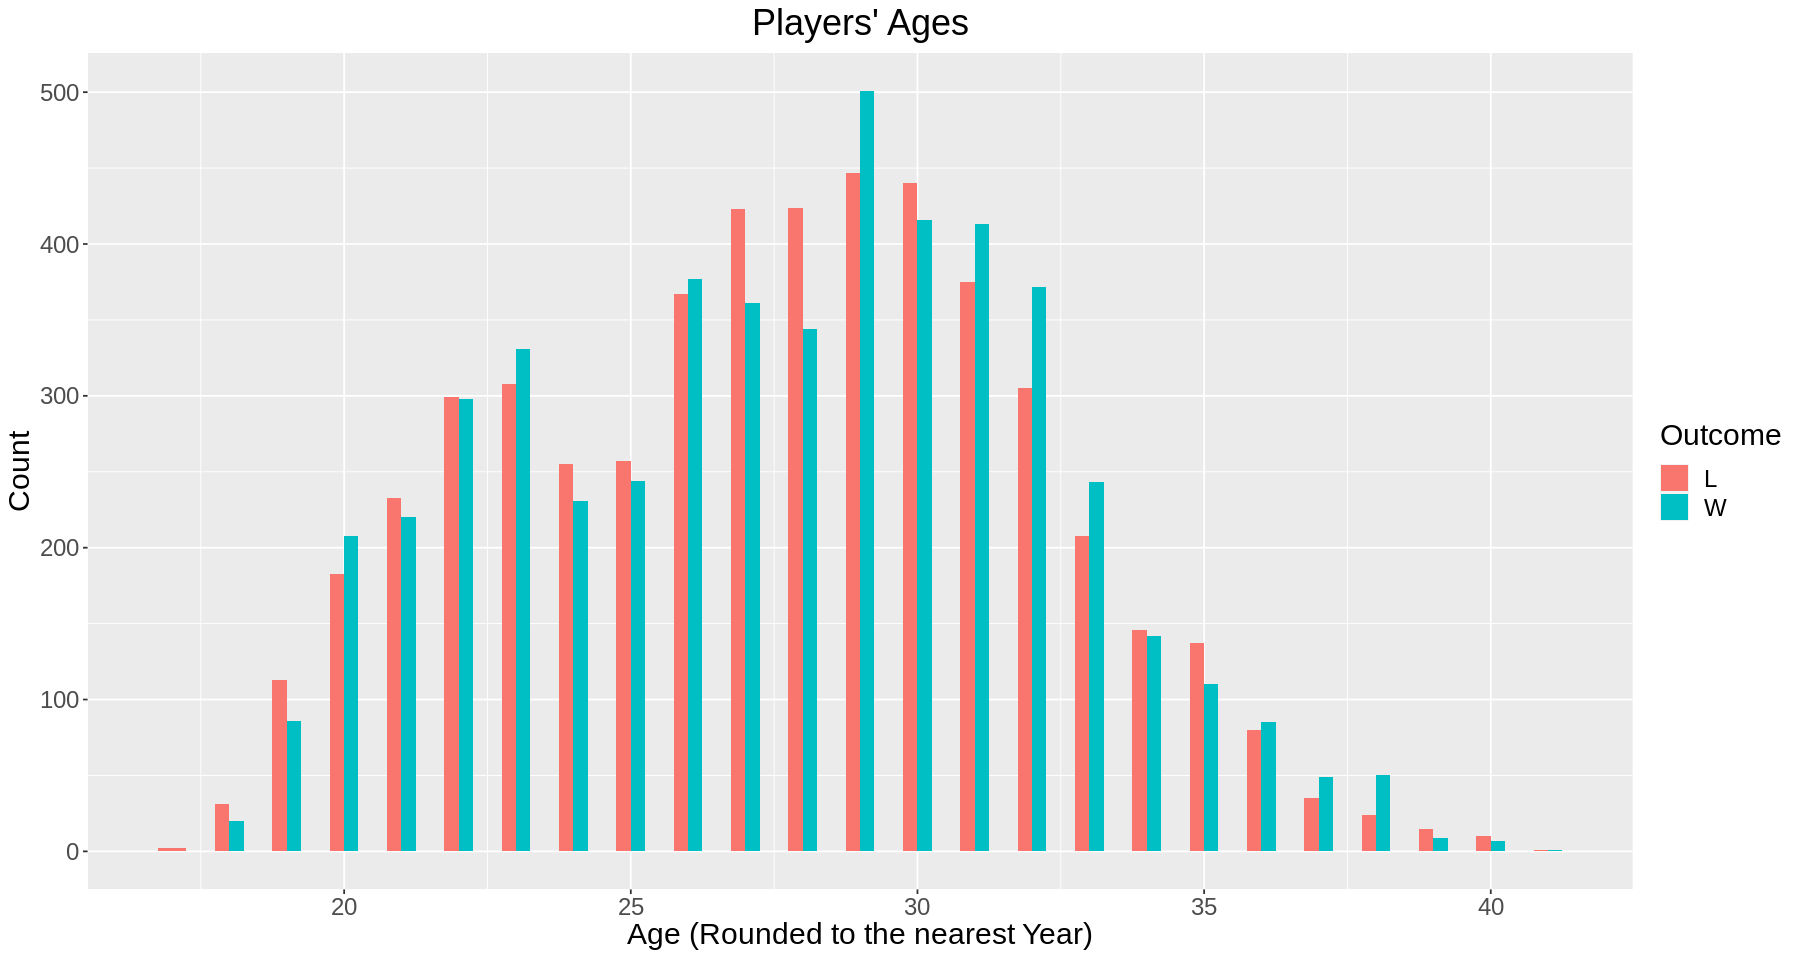

In [25]:
# Exploratory data analysis plot 2:

options(repr.plot.width = 15, repr.plot.height = 8) 

age_plot <- tennis_train %>% 
   ggplot(aes(x = round(age), fill = Outcome)) + 
   geom_bar(stat = "count", position = position_dodge(), width = 0.5) + 
   xlab("Age (Rounded to the nearest Year)")+
   ylab("Count") +
   theme(text = element_text(size = 18)) +
   ggtitle("Players' Ages") + 
   theme(plot.title = element_text(hjust = 0.5))
age_plot

_Figure 2: Histogram of the player's age coloured by match outcome_

Insights from graph!

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Removed 67 rows containing non-finite values (stat_count).”


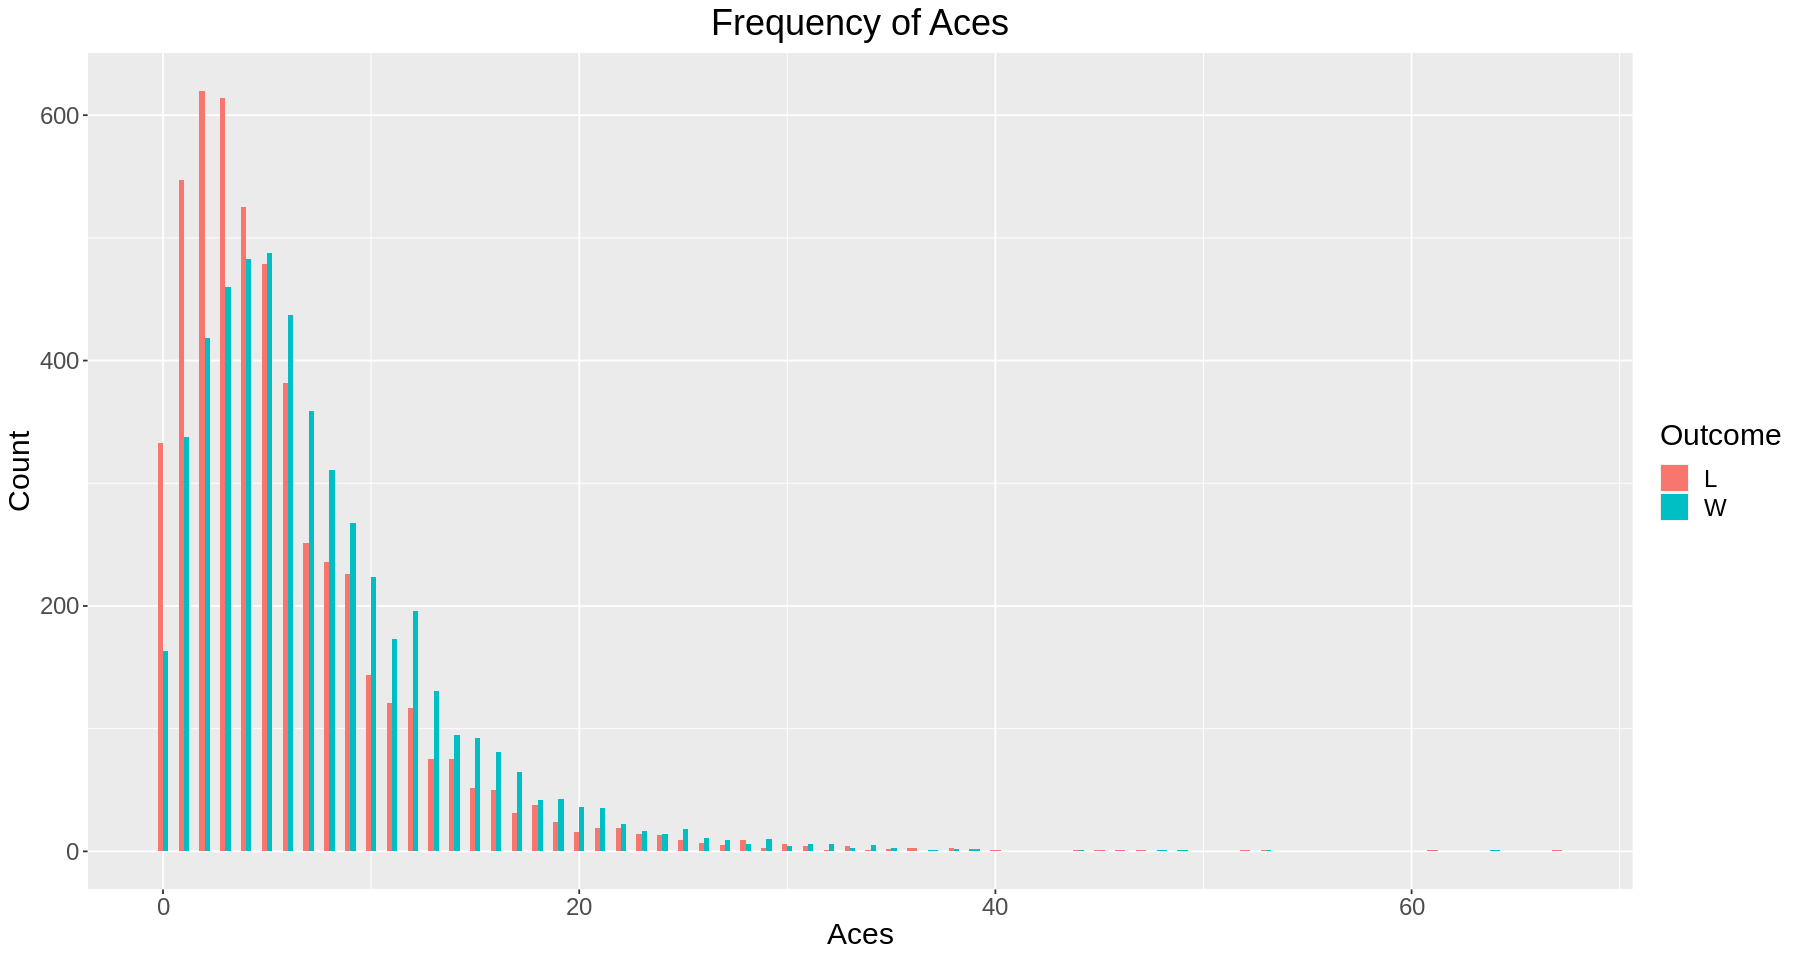

In [26]:
# Exploratory data analysis plot 3:

options(repr.plot.width = 15, repr.plot.height = 8) 

ace_plot <- tennis_train %>% 
   ggplot(aes(x = ace, fill=Outcome)) + 
   geom_histogram(stat = "count", position=position_dodge(), width = 0.5) + 
   xlab("Aces") +
   ylab("Count") +
   theme(text = element_text(size = 18)) +
   ggtitle("Frequency of Aces") + 
   theme(plot.title = element_text(hjust = 0.5))
ace_plot

_Figure 3: Histogram of players' number of aces coloured by match outcome_

The distributions are unimodal and right-skewed. The losers’ distribution has a center at approximately 2 aces while the winners’ distribution has a center at approximately 4 aces. Both distributions have similar ranges between 0 to 70 aces. 

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Removed 67 rows containing non-finite values (stat_count).”


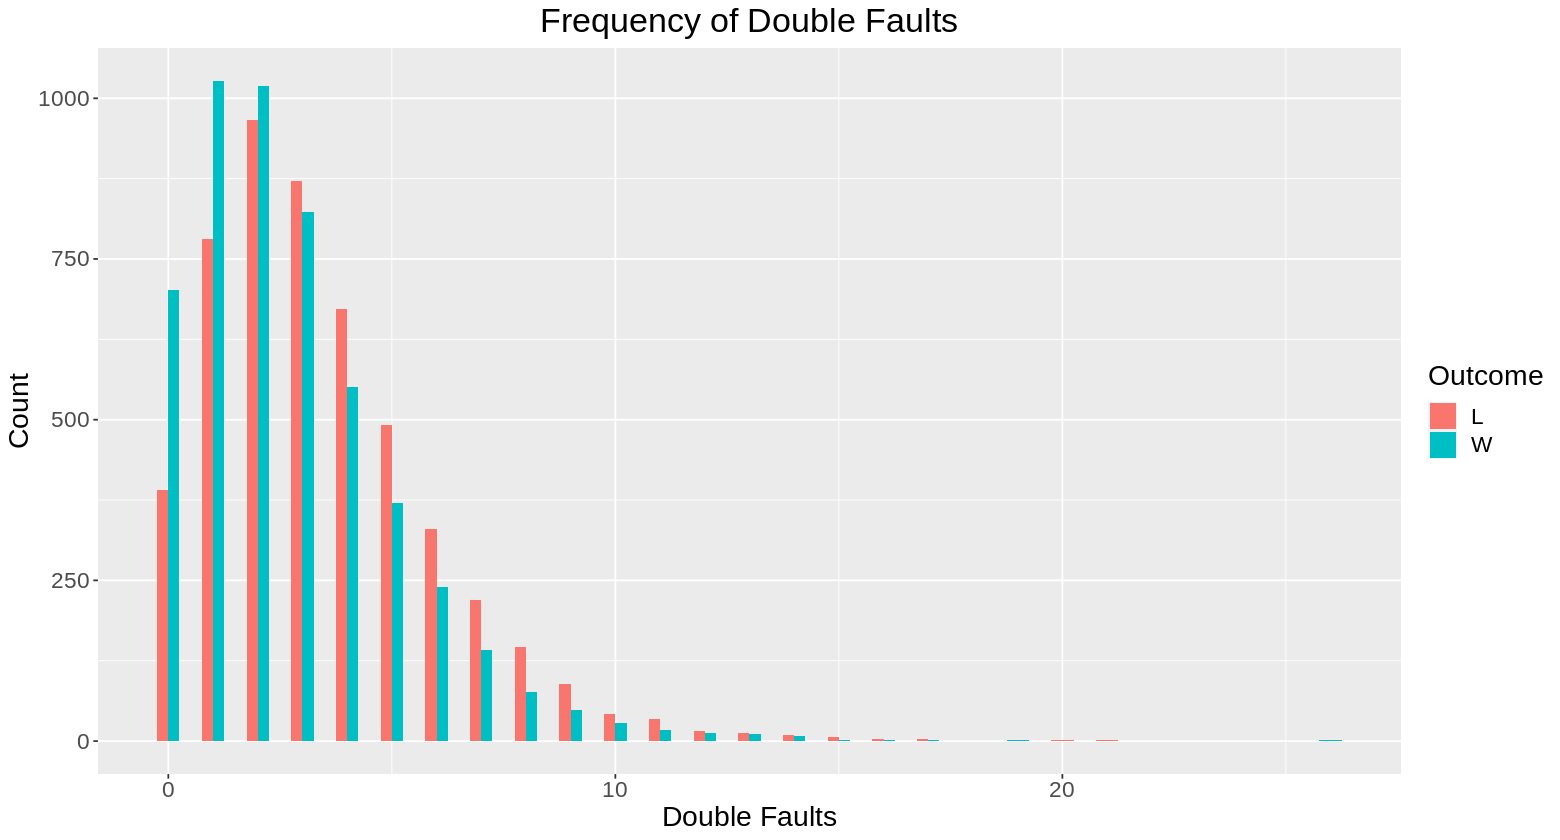

In [27]:
# Exploratory data analysis plot 4:

options(repr.plot.width = 13, repr.plot.height = 7) 

df_plot <- tennis_train %>% 
   ggplot(aes(x = df, fill = Outcome)) + 
   geom_histogram(stat = "count", position=position_dodge(), width = 0.5) + 
   xlab("Double Faults") +
   ylab("Count") +
   theme(text = element_text(size = 17)) +
   ggtitle("Frequency of Double Faults") + 
   theme(plot.title = element_text(hjust = 0.5))
df_plot

_Figure 4: Histogram of players' number of double faults coloured by match outcome_

Both distributions are unimodal and right-skewed, with a center at approximately 3 double faults and similar ranges between 0 to 20 double faults. **There is no significant difference in distribution of winners’ versus losers’ double fault counts.**

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Removed 61 rows containing non-finite values (stat_count).”


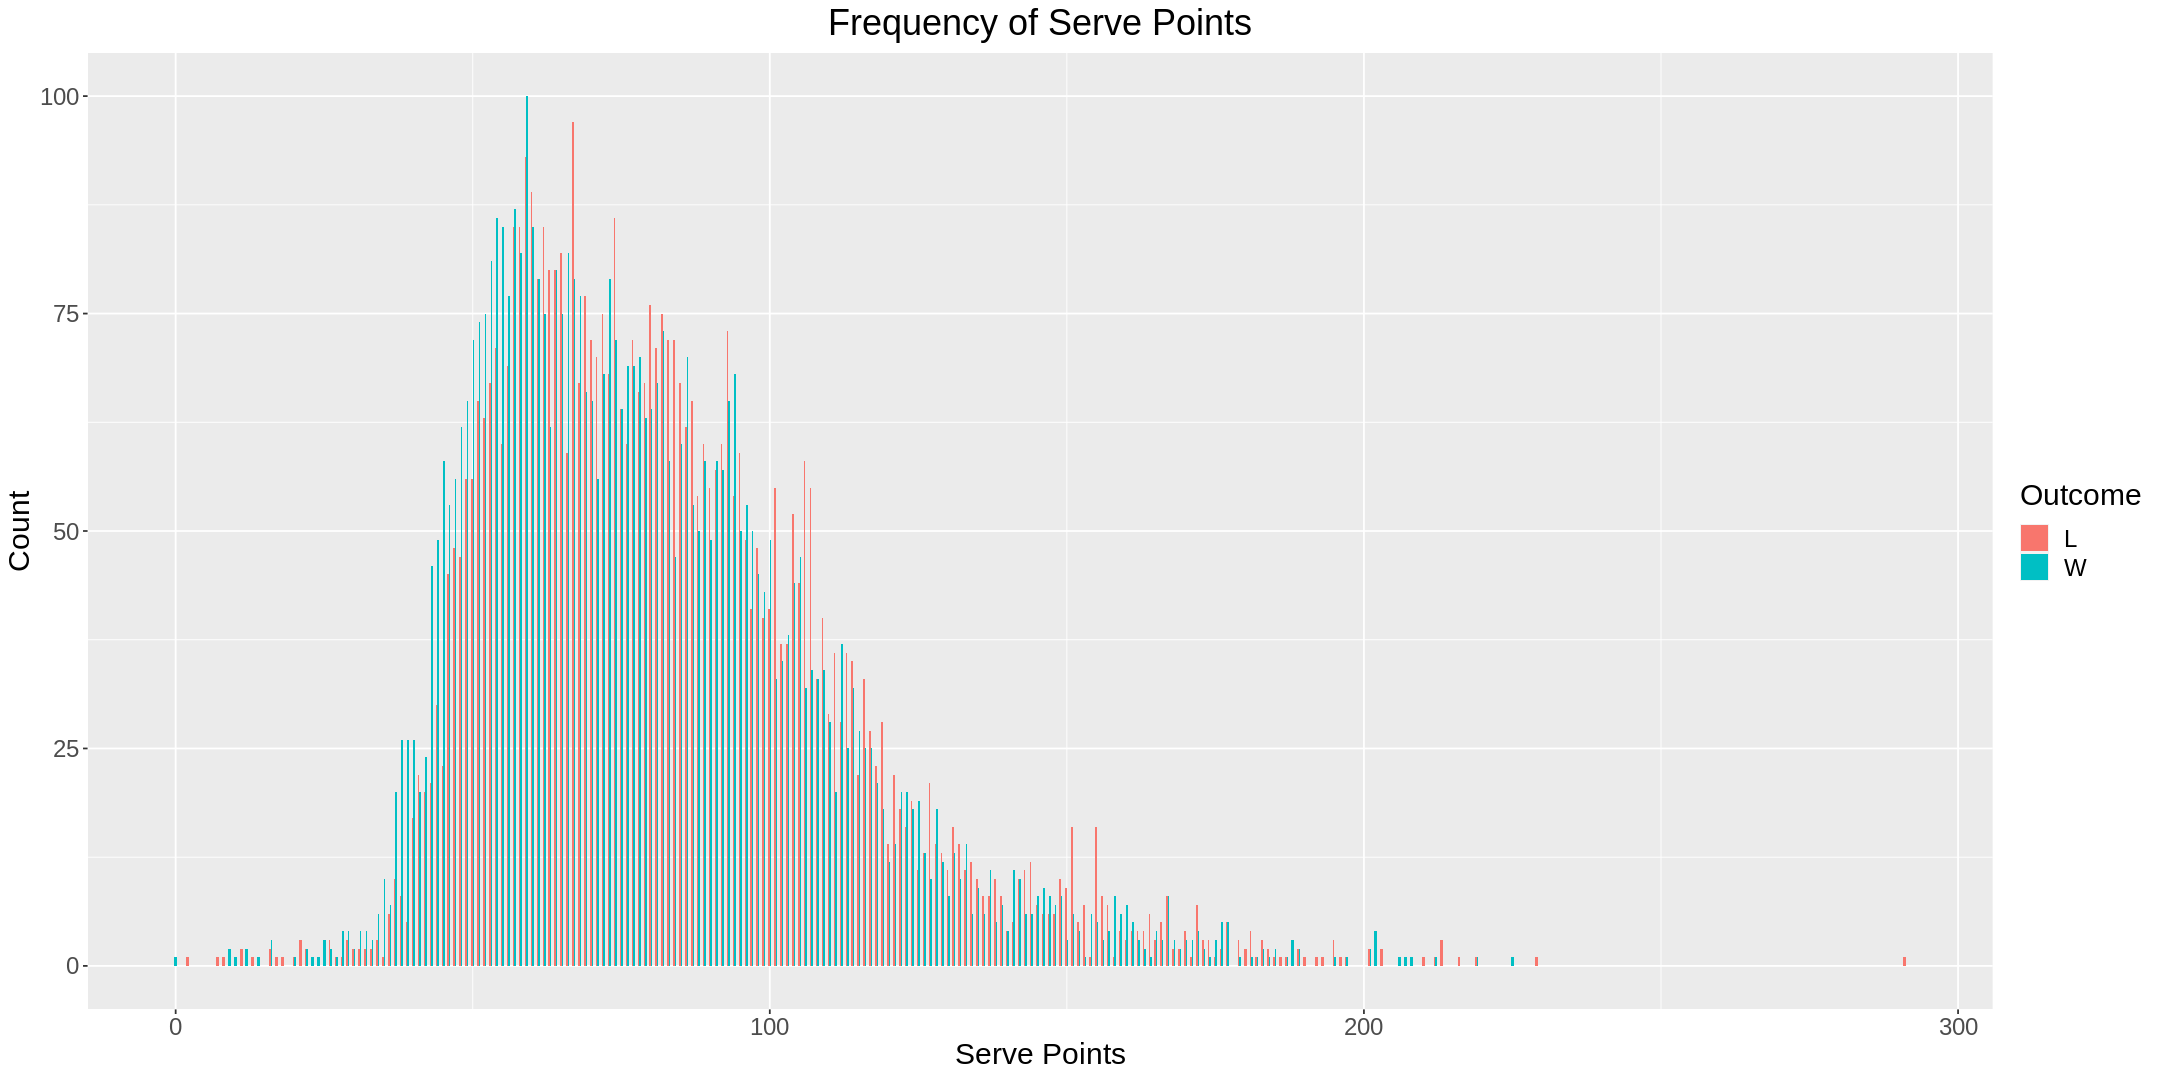

In [12]:
# Exploratory data analysis plot 5: 

options(repr.plot.width = 18, repr.plot.height = 9)

svpt_plot <- tennis_train %>% 
   ggplot(aes(x = svpt, fill = Outcome)) + 
   geom_histogram(stat = "count", position = position_dodge(), width = 0.5) + 
   xlab("Serve Points") +
   ylab("Count") +
   theme(text = element_text(size = 18)) +
   ggtitle("Frequency of Serve Points") + 
   theme(plot.title = element_text(hjust = 0.5))
svpt_plot

_Figure 5: Histogram of players' number of serve points coloured by match outcome_

Both distributions are unimodal and slightly right-skewed with a center at approximately 70 serve points and a range between 0 to 250 serve points. **There is no significant difference in distribution of winners’ versus losers’ serve point counts.**

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Removed 67 rows containing non-finite values (stat_count).”


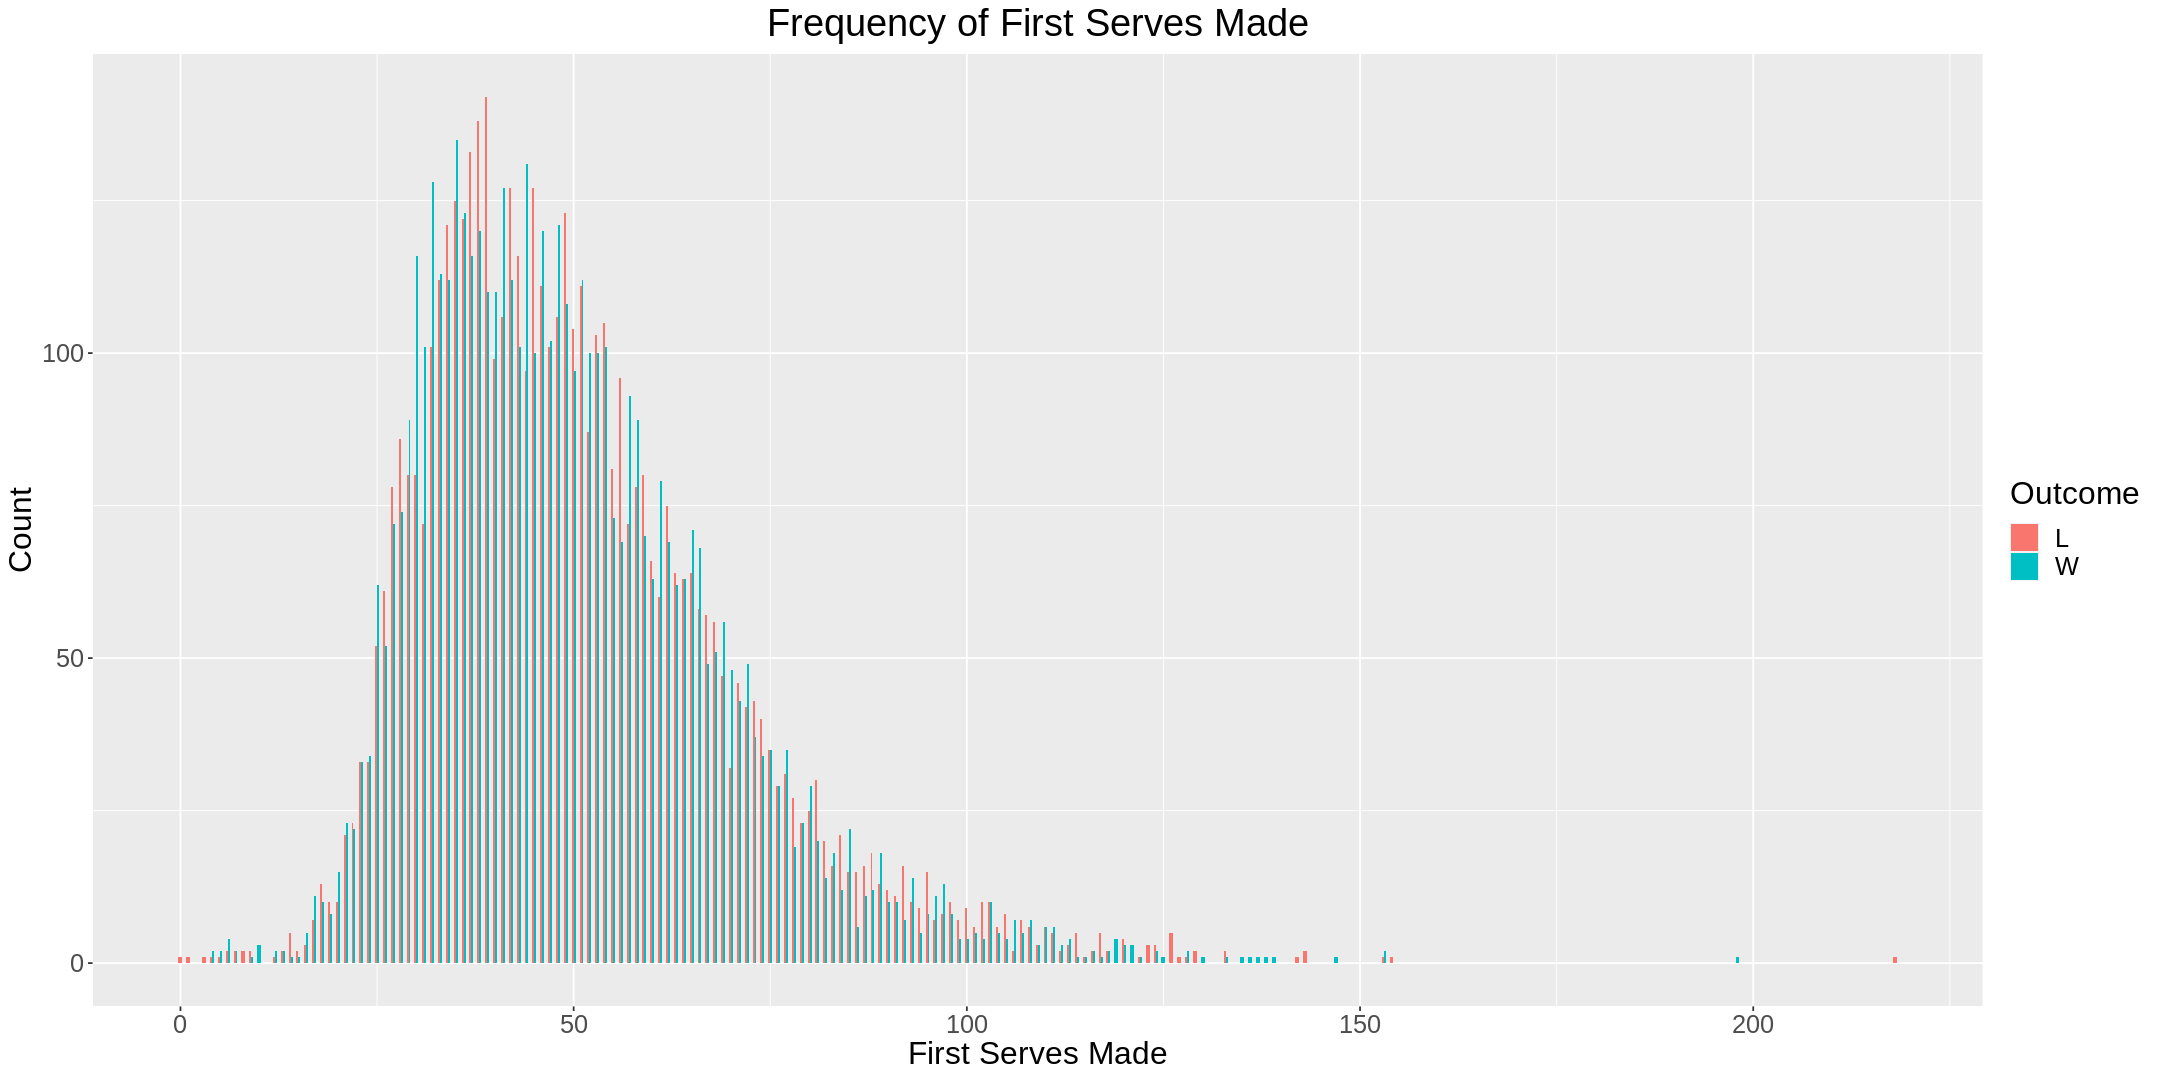

In [28]:
# Exploratory data analysis plot 6:

options(repr.plot.width = 18, repr.plot.height = 9)

firstIn_plot <- tennis_train %>% 
   ggplot(aes(x = firstIn, fill=Outcome)) + 
   geom_histogram(stat = "count", position = position_dodge(), width = .5) + 
   xlab("First Serves Made") +
   ylab("Count") +
   theme(text = element_text(size = 19)) +
   ggtitle("Frequency of First Serves Made") + 
   theme(plot.title = element_text(hjust = 0.5))
firstIn_plot

_Figure 6: Histogram of players' number of first serves made coloured by match outcome_

Both distributions are unimodal and slightly right-skewed with a center at approximately 50 first serves made. They range from 0 to 160 first serves made, with **no significant difference between winners’ and losers’ distributions.**

In [29]:
# Exploratory data analysis plot 7:

options(repr.plot.width = 18, repr.plot.height = 10)

firstWon_plot <- tennis_train %>% 
   ggplot(aes(x = firstWon, fill = Outcome)) + 
   geom_histogram(stat="count", position = position_dodge()) + 
   xlab("First Serves Points Won") +
   ylab("Count") +
   theme(text = element_text(size = 20)) +
   ggtitle("Frequency of First Serve Points Won") + 
   theme(plot.title = element_text(hjust =bb 0.5))
firstWon_plot

ERROR: Error in parse(text = x, srcfile = src): <text>:12:46: unexpected numeric constant
11:    ggtitle("Frequency of First Serve Points Won") + 
12:    theme(plot.title = element_text(hjust =bb 0.5
                                                 ^


_Figure 7: Histogram of players' number of first serves points won coloured by match outcome_

Both distributions are unimodal and right-skewed, with a range between 0 to approximately 110 first serve points won. The losers’ distribution has a center at about 35 first serve points won while the winners’ distribution has a center at about 30 first serve points won. 

In [ ]:
# Exploratory data analysis plot 8:

options(repr.plot.width = 18, repr.plot.height = 9)

secondWon_plot <- tennis_train %>% 
   ggplot(aes(x = secondWon, fill=Outcome)) + 
   geom_histogram(stat = "count", position=position_dodge(), width = .5) + 
   xlab("Second Serves Points Won") +
   ylab("Count") +
   theme(text = element_text(size = 19)) +
   theme(axis.text.x = element_text(angle = 40, hjust = 1)) + 
   ggtitle("Frequency of Second Serve Points Won") +
   theme(plot.title = element_text(hjust = 0.5))
secondWon_plot

_Figure 8: Histogram of players' number of second serves points won coloured by match outcome_

Both distributions are unimodal and slightly right-skewed with a range between 0 to 60 second serve points won. The losers’ distribution has a center at about 14 second serve points won while the winners’ distribution has a center at about 16 second serve points won. 

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Removed 67 rows containing non-finite values (stat_count).”


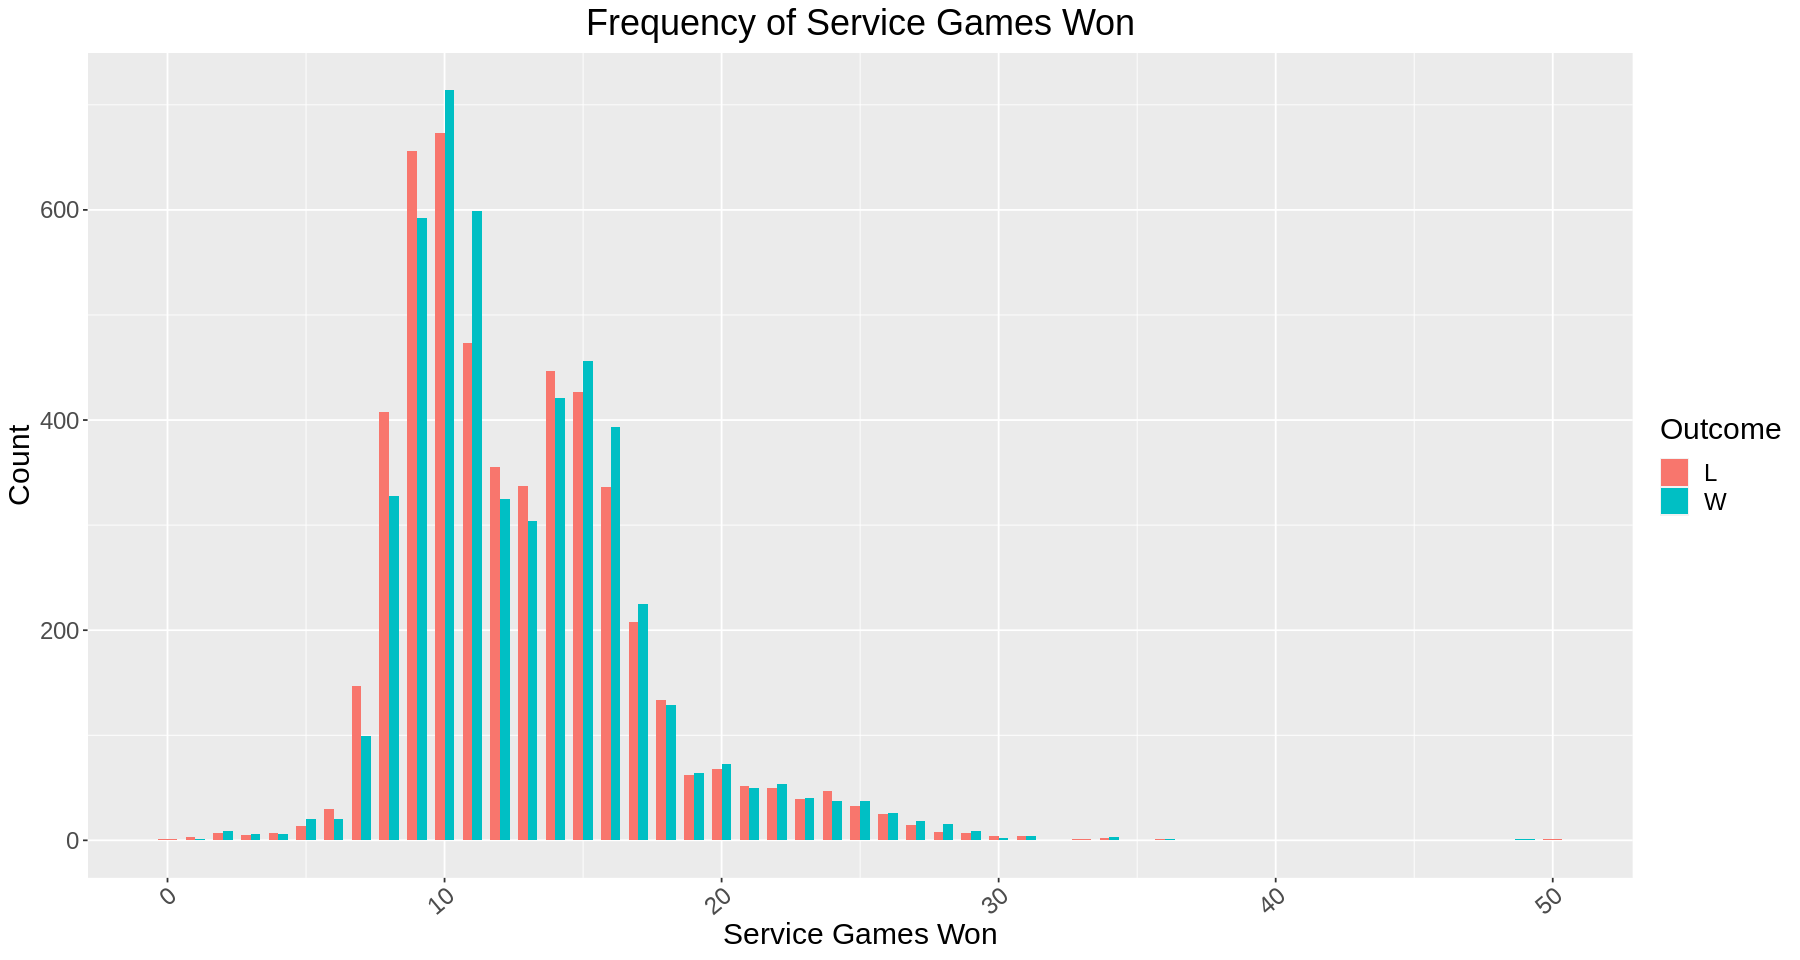

In [31]:
# Exploratory data analysis plot 9:

options(repr.plot.width = 15, repr.plot.height = 8)

SvGms_plot <- tennis_train %>% 
   ggplot(aes(x = SvGms, fill=Outcome)) + 
   geom_histogram(stat = "count", position=position_dodge(), width = .7) + 
   xlab("Service Games Won") +
   ylab("Count") +
   theme(text = element_text(size = 18)) +
   theme(axis.text.x = element_text(angle = 40, hjust = 1)) + 
   ggtitle("Frequency of Service Games Won") +
   theme(plot.title = element_text(hjust = 0.5))
SvGms_plot

_Figure 9: Histogram of players' number of service games won coloured by match outcome_

Both distributions are bimodal with the higher peak at 10 service games won and the smaller peak at 15 service games won. The distributions range from 0 to 35 service games won, with **no significant difference between winners’ and losers’ distributions.**

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Removed 67 rows containing non-finite values (stat_count).”


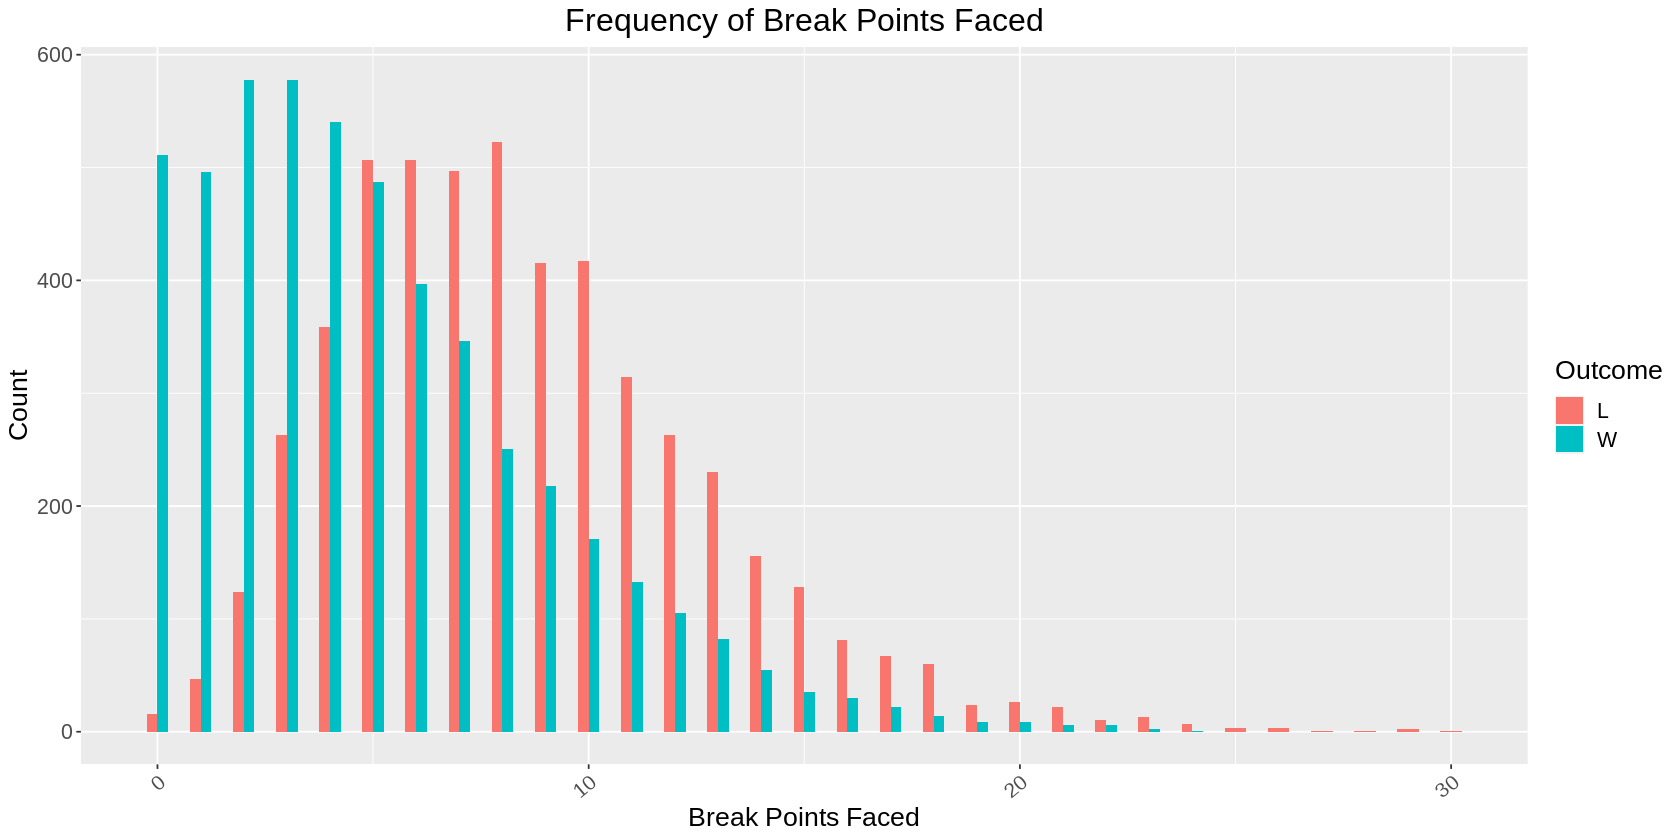

In [32]:
# Exploratory data analysis plot 10:

options(repr.plot.width = 14, repr.plot.height = 7)

bpFaced_plot <- tennis_train %>% 
   ggplot(aes(x = bpFaced, fill=Outcome)) + 
   geom_histogram(stat = "count", position=position_dodge(), width = .5) + 
   xlab("Break Points Faced") +
   ylab("Count") +
   theme(text = element_text(size = 16)) +
   theme(axis.text.x = element_text(angle = 40, hjust = 1)) + 
   ggtitle("Frequency of Break Points Faced") +
   theme(plot.title = element_text(hjust = 0.5))
bpFaced_plot

_Figure 10: Histogram of players' number of break points faced coloured by match outcome_

Both distributions are unimodal and right-skewed. The losers’ distribution has a center at 9 breakpoints faced and a range of 0 to 30 breakpoints faced. The winners’ distribution has a center at 4 breakpoints faced and a range of 0 to 25 breakpoints faced. 

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Removed 67 rows containing non-finite values (stat_count).”


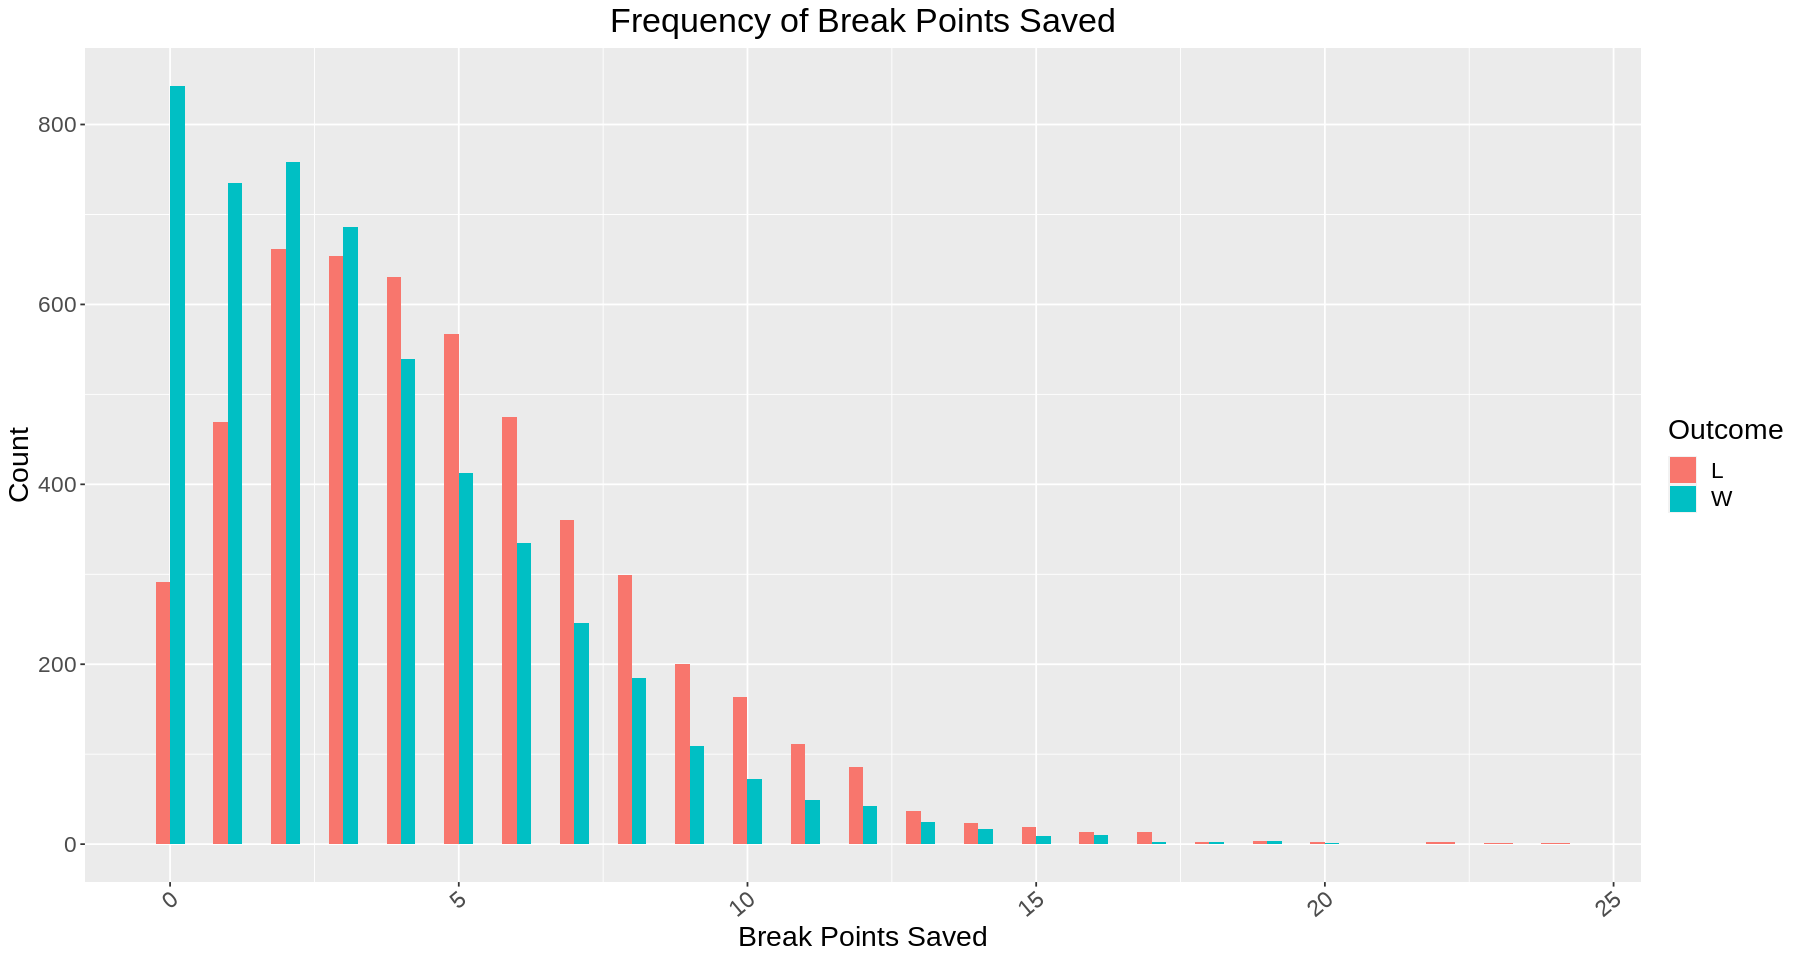

In [33]:
# Exploratory data analysis plot 11:

options(repr.plot.width = 15, repr.plot.height = 8)

bpSaved_plot <- tennis_train %>% 
   ggplot(aes(x = bpSaved, fill=Outcome)) + 
   geom_histogram(stat = "count", position=position_dodge(), width = .5) + 
   xlab("Break Points Saved") +
   ylab("Count") +
   theme(text = element_text(size = 17)) +
   theme(axis.text.x = element_text(angle = 40, hjust = 1)) + 
   ggtitle("Frequency of Break Points Saved") +
   theme(plot.title = element_text(hjust = 0.5))
bpSaved_plot

_Figure 11: Histogram of players' number of break points saved coloured by match outcome_

The distributions are unimodal and right-skewed. The losers’ distribution has a center at 4 breakpoints saved and a range between 0 to 25 breakpoints saved. The winners’ distribution has a center at approximately 3 breakpoints saved and a range between 0 to 20 breakpoints saved.  

**Classification:**

The final predictors chosen for classification were only the variables whose exploratory data analysis plots showed significant differences between winners’ and losers’ distributions: (for both winner and loser) 
- Aces
- First serve won
- Second serve won
- Breakpoint faced
- Breakpoint saved 

NOTE: First serve won and second serve won were added together and divided by Serve point to give a percentage. Aces, Breakpoint faced, and Breakpoint saved were also each divided by Serve point to give a percentage. Since all the predictors were converted to a percentage, scaling was not needed. We chose to standardize using percentages to account for the potential upscaling effect of longer match length. Serve point was utilized as the denominator in percentage calculations since all our chosen predictors are serve-based statistics. 
 


In [34]:
# Creating new percentages columns in training set
tennis_train_final <- tennis_train %>% 
drop_na()%>%
mutate(svptwinp= (firstWon+secondWon)/svpt,
       acep= ace/svpt,
       bpfacep = bpFaced/svpt,
       bpsavedp = bpSaved/svpt,
       Outcome = as_factor(Outcome))%>% 
select(Outcome:bpsavedp)%>%
select(-Index)
tennis_train_final

Outcome,svptwinp,acep,bpfacep,bpsavedp
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
W,0.6233766,0.03896104,0.07792208,0.038961039
W,0.7205882,0.17647059,0.07352941,0.058823529
W,0.6595745,0.10638298,0.08510638,0.042553191
W,0.7407407,0.29629630,0.01851852,0.000000000
W,0.8064516,0.33870968,0.00000000,0.000000000
W,0.7976190,0.20238095,0.02380952,0.023809524
W,0.7333333,0.20000000,0.04000000,0.040000000
W,0.6349206,0.09523810,0.06349206,0.031746032
W,0.7500000,0.12500000,0.00000000,0.000000000


_Table 4: Final predictors and prediction class variable table for training set_

In [18]:
# Creating new percentages columns in testing set to match
tennis_test_final <- tennis_test %>% 
drop_na()%>%
mutate(svptwinp= (firstWon+secondWon)/svpt,
       acep= ace/svpt,
       bpfacep = bpFaced/svpt,
       bpsavedp = bpSaved/svpt,
       Outcome = as_factor(Outcome))%>%
select(Outcome:bpsavedp)%>%
select(-Index)
tennis_test_final

Outcome,svptwinp,acep,bpfacep,bpsavedp
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
W,0.7205882,0.17647059,0.07352941,0.058823529
W,0.7310924,0.36974790,0.01680672,0.008403361
W,0.6530612,0.08163265,0.05102041,0.030612245
W,0.7179487,0.06837607,0.03418803,0.034188034
W,0.7619048,0.07142857,0.00000000,0.000000000
W,0.6779661,0.16949153,0.08474576,0.050847458
W,0.7121212,0.07575758,0.03030303,0.000000000
W,0.6666667,0.16666667,0.03703704,0.000000000
W,0.6635514,0.08411215,0.05607477,0.056074766


_Table 5: Final predictors and prediction class variable table for testing set_

In [19]:
# Check to see the balance of outcomes after removing NAs
num_obs <- nrow(tennis_train_final)
tennis_train_final %>%
  group_by(Outcome) %>%
  summarize(
    count = n(),
    percentage = n() / num_obs * 100
  )%>%
ungroup()

`summarise()` ungrouping output (override with `.groups` argument)



Outcome,count,percentage
<fct>,<int>,<dbl>
W,5085,49.97543
L,5090,50.02457


_Table 6: variable balance % check(only need to do training because split function splits evenly)_

In [ ]:
# KNN classification tuning(note no scaling is necessary due to our variables being percentage-wise)
tennis_recipe <- recipe(Outcome ~., data = tennis_train_final) 
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
  set_engine("kknn") %>% 
  set_mode("classification")
# Tuning 
tennis_train_final_vfold <- vfold_cv(tennis_train_final, v = 5, strata = Outcome)

k_vals <- tibble(neighbors = seq(from = 100, to = 1000, by = 100))

knn_results <- workflow() %>%
  add_recipe(tennis_recipe) %>%
  add_model(knn_spec) %>%
  tune_grid(resamples = tennis_train_final_vfold, grid = k_vals) %>%
  collect_metrics() 
accuracies <- knn_results %>%
  filter(.metric == "accuracy")
# Graph of neighbours vs mean accuracy 
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12))

accuracy_vs_k
                            

_Figure 12: KNN neighbors vs prediction accuracies line graph_

In [ ]:
# KNN classification predicting
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 250) %>% 
  set_engine("kknn") %>% 
  set_mode("classification")
tennis_fit <- workflow() %>%
  add_recipe(tennis_recipe) %>%
  add_model(knn_spec) %>%
  fit(tennis_train_final)
tennis_predict <- predict(tennis_fit, tennis_test_final)%>%
                             bind_cols(tennis_test_final)
# Create an accuracy output table and confusion matrix 
tennis_metrics <- tennis_predict %>% metrics(truth=Outcome, estimate = .pred_class)
  
tennis_metrics


In [ ]:
tennis_conf_mat <- tennis_predict %>%
                        conf_mat(truth = Outcome, estimate = .pred_class)      

tennis_conf_mat 

In [ ]:
# visualization
# 2 graphs using different variables with importance to each other, serve category graph and break point category graph
serve_g <- tennis_predict %>%
  ggplot(aes(x = svptwinp, y = acep, color = Outcome)) +
  geom_point(alpha = 0.5) +
  labs(x = "Serve Point Win %", 
       y = "Ace %",
       color = "Outcome") +
  theme(text = element_text(size = 12))

serve_g

_Figure 13: Serve point win% vs ace% scatterplot colored by match outcome_

In [ ]:
bp_g <- tennis_predict %>%
  ggplot(aes(x = bpfacep, y = bpsavedp, color = Outcome)) +
  geom_point(alpha = 0.5) +
  labs(x = "Breakpoints Faced %", 
       y = "Breakpoints Saved %",
       color = "Outcome") +
  theme(text = element_text(size = 12))
bp_g 

_Figure 14: breakpoint faced% vs breakpoint saved% scatterplot colored by match outcome_

### DISCUSSION

- summarize what you found
- discuss whether this is what you expected to find?
- discuss what impact could such findings have?
- discuss what future questions could this lead to?

FROM PROPOSAL:

We expect to find a correlation between match statistics and match outcome. For example, a player that has a high number of aces is more likely to win the match, and vice versa. 

This data analysis can have an impact on the training of tennis players. If certain match statistics are found to increase the chance of winning a match, players could focus on training those skills. Additionally, the data could also benefit audiences who participate in betting. Using previous match statistics or data from early matches, participants could more accurately place money on the winning player.  

**Future questions that could be investigated:**
- Could these predictions be used to find rank difference, winner rank and loser rank?
- Are certain match statistics more influential in the match outcome than others?

### REFERENCES
[1] https://drive.google.com/uc?export=download&id=1fOQ8sy_qMkQiQEAO6uFdRX4tLI8EpSTn

[2] https://count.co/notebook/j0OYDOaWDmn

[3] De Seranno, A. (2020). Predicting Tennis Matches Using Machine Learning (dissertation). Ghent University, Ghent. 